In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
INvideos = pd.read_csv('../input/youtube-new/INvideos.csv')

In [3]:
# Some settings for plots
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
INvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [5]:
INvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


### DATA CLEANING

In [6]:
# we can see in the info that the description column has NaN values, so we fill it with empty string
INvideos['description'] = INvideos['description'].fillna("")
INvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               37352 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


### EDA

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


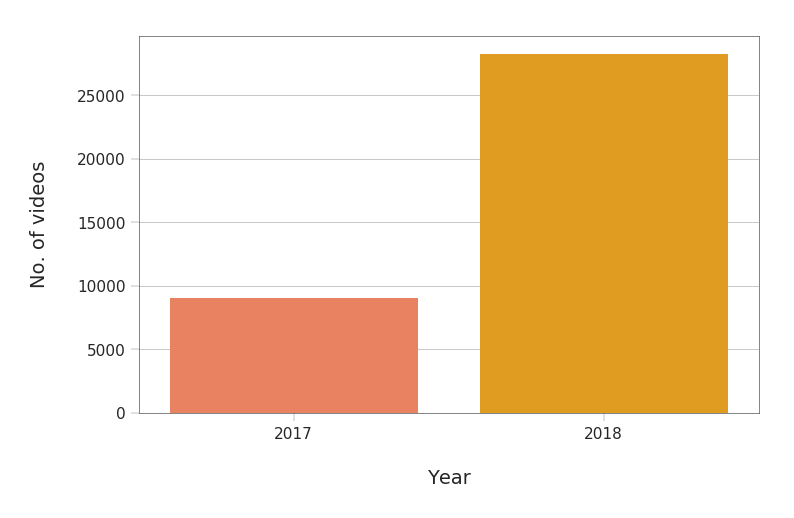

In [7]:
#Determining when the data was collected
INvideo = INvideos['trending_date'].apply(lambda x:'20'+x[:2]).value_counts().to_frame().reset_index().rename(columns={"index":"year","trending_date":"No_of_videos"})

#plot the result
fig,ax = plt.subplots()
yrs = sns.barplot(x="year",y="No_of_videos",palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7),data=INvideo,ax=ax)
yrs = ax.set(xlabel='Year',ylabel='No. of videos')

In [8]:
#some statistics about the important features to know the range of variation of these features for the trending videos.
INvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


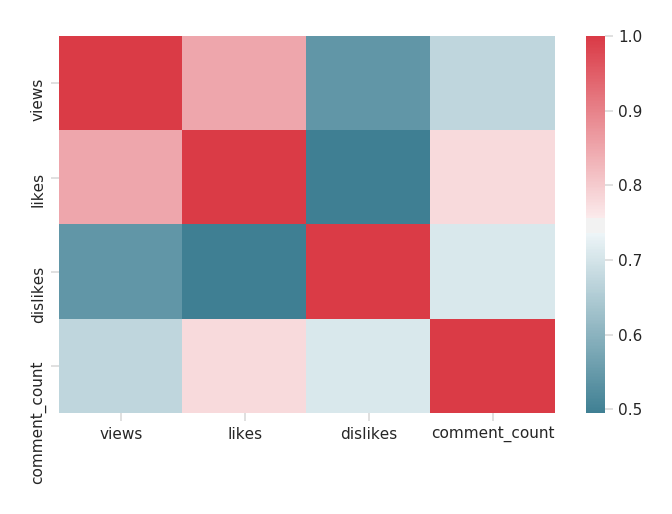

In [9]:
#correlogram - to understand the correlation between different features in the data.
fig,ax = plt.subplots()
corr = INvideos[['views','likes','dislikes','comment_count']].corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),ax=ax)

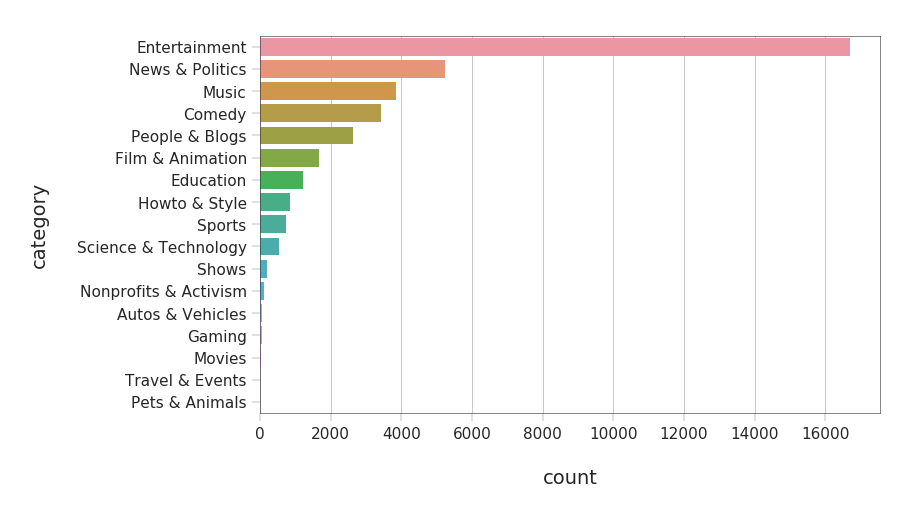

In [10]:
# To identify which are the common categories that goes viral

#Load the json file to match the category IDs to their respective category
categories = pd.read_json("../input/youtube-new/IN_category_id.json")
arr = categories["items"]
items = len(arr)

ids = []
for i in range(len(arr)):
    ids.append(categories["items"][i]['id'])

names = []
for i in range(len(arr)):
    names.append(categories["items"][i]["snippet"]["title"])

category = dict()
for i in range(len(names)):
    category[int(ids[i])] = names[i]
category[29] = "Nonprofits & Activism"

INvideos['Categories'] = [category[x] for x in INvideos['category_id']]
cat = INvideos['Categories'].value_counts().to_frame().reset_index().rename(columns={"index":"category","Categories":"count"})
sns.barplot(x="count",y="category",data = cat)

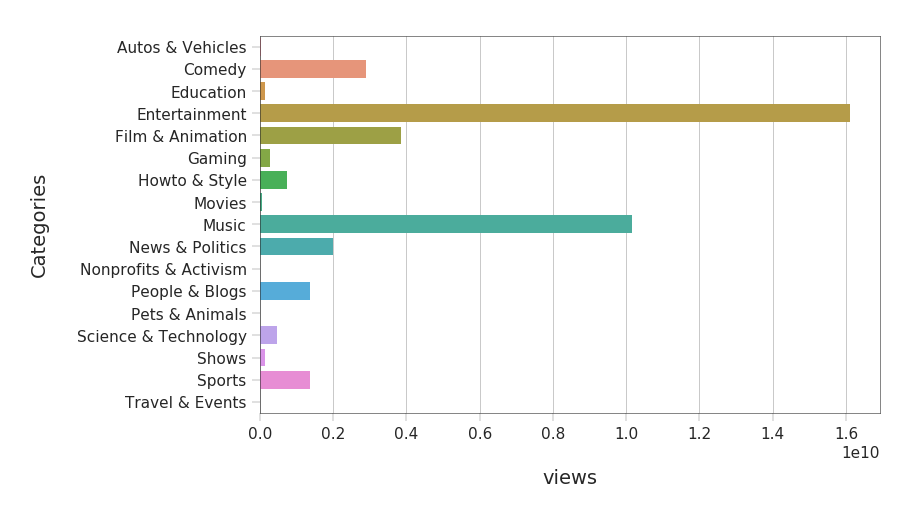

In [11]:
# Determine which categories are most viewed.
view = INvideos[["Categories","views"]]
view_df = view.groupby("Categories").sum().reset_index()
sns.barplot(x="views",y="Categories",data=view_df)

We can see from the above plot that the number of views are more in entertainment and music categories.
The trending/popularity of the videos is not highly correlated with the number of views for that category videos as the we can see that the number of views in music, comedy and film/animation is greater than the no. of views in category but there are more number of videos trending in the News/politics category.

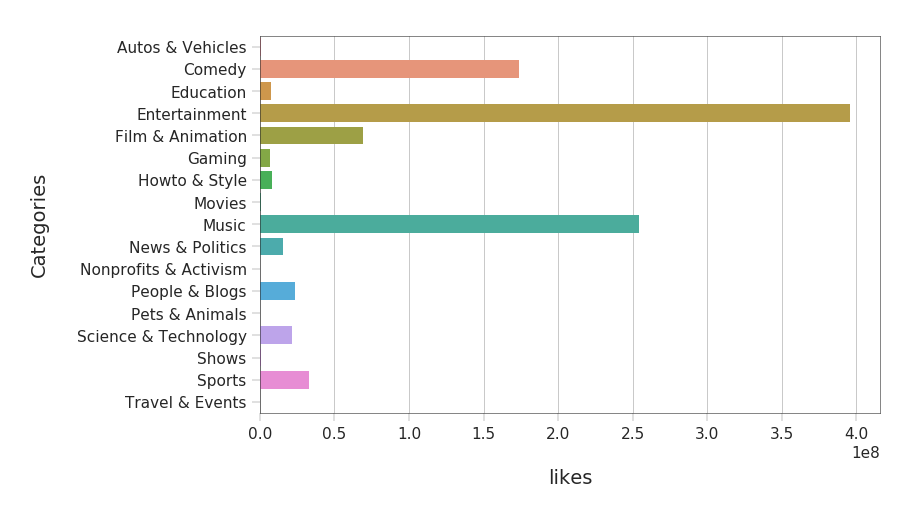

In [12]:
#determine how the number of like affects the popularity of the videos.
like = INvideos[["Categories","likes"]]
like_df = like.groupby("Categories").sum().reset_index()
sns.barplot(x="likes",y="Categories",data=like_df)

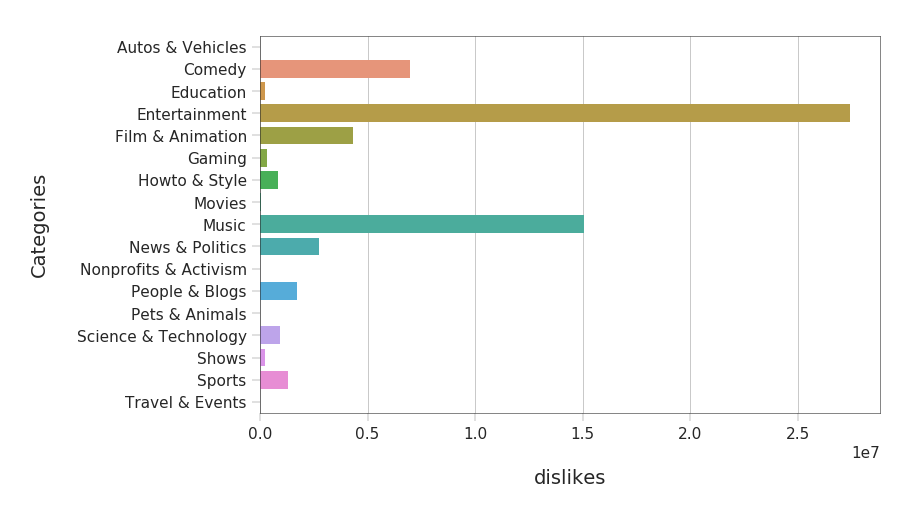

In [13]:
#Analysing the effect of dislikes on videos.
dislike = INvideos[["Categories","dislikes"]]
dislike_df = dislike.groupby("Categories").sum().reset_index()
sns.barplot(x="dislikes",y="Categories",data=dislike_df)

From the plot of likes and dislikes against category, it can be see that the number of likes as well as dislikes are highest for entertainment category which follows for other categories as well. So we can conclude that neither one of them have a very high influence on the videos going viral on youtube.